In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import keras
import glob
import cv2

imagesdataset_=[]
labelsdataset_=[]

for dir_path in glob.glob("/content/drive/MyDrive/Smoking_Dataset/valid/SMOKING"):
    label = "Smoking"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (224, 224))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        imagesdataset_.append(image)
        labelsdataset_.append(label)
#for dir_path in glob.glob("/content/drive/MyDrive/MEITY DATA2/TotalDataSet /Train/BLB"):
    #label = "BLB"
   # for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
       # image = cv2.imread(image_path, cv2.IMREAD_COLOR)
      #  image = cv2.resize(image, (224, 224))
        #image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
       # imagesdataset_.append(image)
       # labelsdataset_.append(label) 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for dir_path in glob.glob("/content/drive/MyDrive/Smoking_Dataset/valid/notsmoking"):
    label = "not smoking"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (224, 224))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        imagesdataset_.append(image)
        labelsdataset_.append(label)
#for dir_path in glob.glob("/content/driv

In [ ]:
for dir_path in glob.glob("/home/iitn/Desktop/Priyanhu/Brown spot_mean_shift"):
    label = "BS"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (224, 224))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        imagesdataset_.append(image)
        labelsdataset_.append(label)

In [ ]:
for dir_path in glob.glob("/home/iitn/Desktop/Priyanhu/Leaf_mean"):
    label = "lb"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (224, 224))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        imagesdataset_.append(image)
        labelsdataset_.append(label)

In [ ]:
#Sheath_mean
for dir_path in glob.glob("/home/iitn/Desktop/Priyanhu/Sheath_mean"):
    label = "sb"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (224, 224))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        imagesdataset_.append(image)
        labelsdataset_.append(label)


In [ ]:
imagesdataset = np.array(imagesdataset_)
labelsdataset = np.array(labelsdataset_)

In [ ]:
label_to_id_dict = {v:i for i,v in enumerate(np.unique(labelsdataset))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

label_ids = np.array([label_to_id_dict[x] for x in labelsdataset])

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_valid, Y_train, Y_valid = train_test_split(imagesdataset,label_ids, test_size = 0.20)

In [ ]:
X_train = X_train/255
X_valid = X_valid/255

In [ ]:
from tensorflow.keras.utils import to_categorical

Y_train_cat = to_categorical(Y_train, 2)
Y_valid_cat = to_categorical(Y_valid, 2)

In [ ]:
id_to_label_dict

{0: 'Smoking', 1: 'not smoking'}

In [ ]:
# Load the model
from tensorflow.keras.models import load_model
model1 = load_model('/content/drive/MyDrive/Smoking_Dataset/DenseNet_20epoch.h5')
import sklearn.metrics as metrics
yPreds1 = model1.predict(X_valid)
yPred1 = np.argmax(yPreds1, axis=1)
y_True1 = Y_valid_cat
yTrue1 = np.argmax(y_True1, axis=1)

accuracy1 = metrics.accuracy_score(yTrue1, yPred1) * 100
error1 = 100 - accuracy1
print("Accuracy : ", accuracy1)
print("Error : ", error1)
print(yPred1)

3/3 [==============================] - 15s 4s/step
Accuracy :  94.56521739130434
Error :  5.434782608695656
[0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0
 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1]


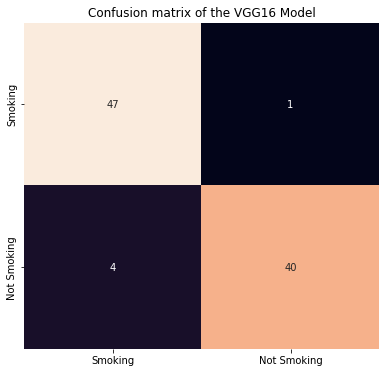

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(yTrue1, yPred1)
CLASSES = ['Smoking', 'Not Smoking']

plt.figure(1, figsize=(14, 6))
plt.subplot(121)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix of the VGG16 Model') 
sns.heatmap(pd.DataFrame(cm1, index=CLASSES, columns=CLASSES), annot=True, fmt='d', cbar=False)

In [ ]:
pip install seaborn


  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, yPred1, target_names=CLASSES))

              precision    recall  f1-score   support

     Smoking       0.92      0.98      0.95        48
 Not Smoking       0.98      0.91      0.94        44

    accuracy                           0.95        92
   macro avg       0.95      0.94      0.95        92
weighted avg       0.95      0.95      0.95        92



In [ ]:
model2 = load_model('/content/drive/MyDrive/Smoking_Dataset/Xception_10epoch.h5')
import sklearn.metrics as metrics
yPreds2 = model2.predict(X_valid)
yPred2 = np.argmax(yPreds2, axis=1)
y_True2 = Y_valid_cat
yTrue2 = np.argmax(y_True2, axis=1)

accuracy2 = metrics.accuracy_score(yTrue2, yPred2) * 100
error2 = 100 - accuracy2
print("Accuracy : ", accuracy2)
print("Error : ", error2)

3/3 [==============================] - 18s 6s/step
Accuracy :  93.47826086956522
Error :  6.521739130434781


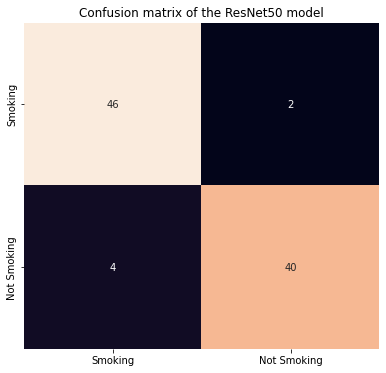

In [ ]:
cm1 = confusion_matrix(yTrue2, yPred2)
CLASSES = ['Smoking', 'Not Smoking']

plt.figure(1, figsize=(14, 6))
plt.subplot(121)
plt.title('Confusion matrix of the ResNet50 model')
sns.heatmap(pd.DataFrame(cm1, index=CLASSES, columns=CLASSES), annot=True, fmt='d', cbar=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, yPred2, target_names=CLASSES))

              precision    recall  f1-score   support

     Smoking       0.92      0.96      0.94        48
 Not Smoking       0.95      0.91      0.93        44

    accuracy                           0.93        92
   macro avg       0.94      0.93      0.93        92
weighted avg       0.94      0.93      0.93        92



In [ ]:
model3 = load_model('/content/drive/MyDrive/Smoking_Dataset/resnet50_10epoch.h5')
import sklearn.metrics as metrics
yPreds3 = model3.predict(X_valid)
yPred3 = np.argmax(yPreds3, axis=1)
y_True3 = Y_valid_cat
yTrue3 = np.argmax(y_True3, axis=1)

accuracy3 = metrics.accuracy_score(yTrue3, yPred3) * 100
error3 = 100 - accuracy3
print("Accuracy : ", accuracy3)
print("Error : ", error3)

3/3 [==============================] - 16s 5s/step
Accuracy :  82.6086956521739
Error :  17.391304347826093


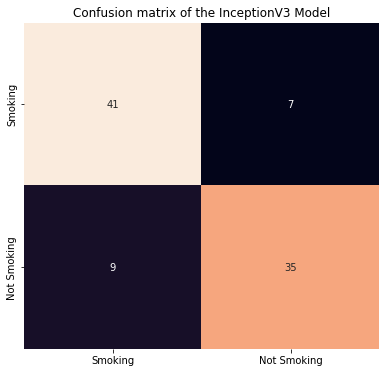

In [ ]:
cm1 = confusion_matrix(yTrue3, yPred3)
CLASSES = ['Smoking', 'Not Smoking']

plt.figure(1, figsize=(14, 6))
plt.subplot(121)
plt.title('Confusion matrix of the InceptionV3 Model')
sns.heatmap(pd.DataFrame(cm1, index=CLASSES, columns=CLASSES), annot=True, fmt='d', cbar=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, yPred3, target_names=CLASSES))

              precision    recall  f1-score   support

     Smoking       0.82      0.85      0.84        48
 Not Smoking       0.83      0.80      0.81        44

    accuracy                           0.83        92
   macro avg       0.83      0.82      0.83        92
weighted avg       0.83      0.83      0.83        92



In [ ]:
model4 = load_model('/content/drive/MyDrive/Smoking_Dataset/inception_10epoh.h5')
import sklearn.metrics as metrics
yPreds4 = model4.predict(X_valid)
yPred4 = np.argmax(yPreds4, axis=1)
y_True4 = Y_valid_cat
yTrue4 = np.argmax(y_True4, axis=1)

accuracy4 = metrics.accuracy_score(yTrue4, yPred4) * 100
error4 = 100 - accuracy4
print("Accuracy : ", accuracy4)
print("Error : ", error4)

3/3 [==============================] - 11s 3s/step
Accuracy :  92.3913043478261
Error :  7.608695652173907


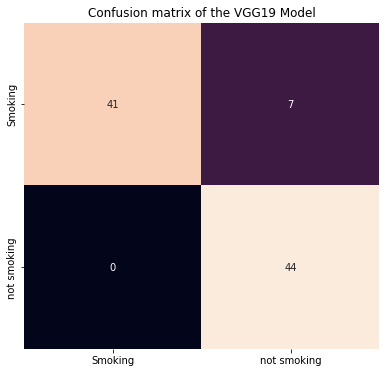

In [ ]:
cm1 = confusion_matrix(yTrue4, yPred4)
CLASSES = ['Smoking', 'not smoking']

plt.figure(1, figsize=(14, 6))
plt.subplot(121)
plt.title('Confusion matrix of the VGG19 Model')
sns.heatmap(pd.DataFrame(cm1, index=CLASSES, columns=CLASSES), annot=True, fmt='d', cbar=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, yPred4, target_names=CLASSES))

              precision    recall  f1-score   support

     Smoking       1.00      0.85      0.92        48
 not smoking       0.86      1.00      0.93        44

    accuracy                           0.92        92
   macro avg       0.93      0.93      0.92        92
weighted avg       0.93      0.92      0.92        92



In [ ]:
def GetAccuracy(CMat):
    ConfSum = np.sum(CMat,axis=0)
    Num = []
    for i in range(len(CMat)):
        for j in range(len(CMat[i])):
            if(i==j):
                Num.append(CMat[i][j])
    Value = 0
    for i in range(len(ConfSum)):
        Value += Num[i]/ConfSum[i]
    Value = Value/len(Num)
    return float(Value)*100

In [ ]:
def GetVotingClassifier(pred1,acc1,pred2,acc2,pred3,acc3,pred4,acc4):
    TotalPredict = []
    for i in range(len(pred1)):
        TotalPredict.append([pred1[i],pred2[i],pred3[i],pred4[i]])

    TotalAccuracy = [acc1,acc2,acc3,acc4,]

    VoteY = []

    for i in range(len(pred1)):
        VoteForOne = np.zeros([6,1])
        for j in range(2):
            VoteForOne[TotalPredict[i][j]]+=TotalAccuracy[j] # Adding accuracy based on predicted Y
        FinalVote = np.argmax(VoteForOne) # Returns index of maximum row
        VoteY.append(FinalVote)

    
    VoteConfMat = confusion_matrix(VoteY, Y_valid)
    VoteAccuracy = GetAccuracy(VoteConfMat)
    print("Test set score for Voting Classifier on "+": %f" % VoteAccuracy)

    return VoteConfMat, VoteY

In [ ]:
ConfMat, VoteY = GetVotingClassifier(yPred1,accuracy1,yPred2,accuracy2,yPred3,accuracy3,yPred4,accuracy4)
print('\nConfusion Matrix for Majority Voting Classifier :\n')
print(ConfMat)

Test set score for Voting Classifier on : 94.412879

Confusion Matrix for Majority Voting Classifier :

[[47  4]
 [ 1 40]]


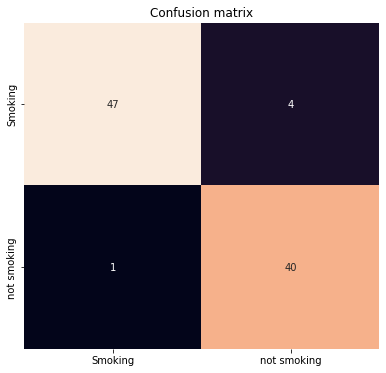

In [ ]:
plt.figure(1, figsize=(14, 6))
plt.subplot(121)
plt.title('Confusion matrix')
sns.heatmap(pd.DataFrame(ConfMat, index=CLASSES, columns=CLASSES), annot=True, fmt='d', cbar=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, VoteY, target_names=CLASSES))

              precision    recall  f1-score   support

     Smoking       0.92      0.98      0.95        48
 not smoking       0.98      0.91      0.94        44

    accuracy                           0.95        92
   macro avg       0.95      0.94      0.95        92
weighted avg       0.95      0.95      0.95        92



In [ ]:
from sklearn.model_selection import KFold

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from PIL import Image
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import warnings
import os
import shutil
from PIL import ImageFile
warnings.simplefilter('error', Image.DecompressionBombWarning)
ImageFile.LOAD_TRUNCATED_IMAGES = True
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
datasetFolderName='/home/iitn/Desktop/Priyanhu/dataset'
MODEL_FILENAME="/home/iitn/Desktop/Priyanhu/InceptionV3_Optimized_200Epoch.h5"
sourceFiles=[]
classLabels=['BLB','brown spot','false smut','leaf blast','shealth blight']
X=[]
Y=[]

img_rows, img_cols =  100, 100 # input image dimensions
train_path=datasetFolderName+'/train/'
validation_path=datasetFolderName+'/validation/'
test_path=datasetFolderName+'/test/'

In [ ]:
def transferBetweenFolders(source, dest, splitRate): 
    global sourceFiles
    sourceFiles=os.listdir(source)
    if(len(sourceFiles)!=0):
        transferFileNumbers=int(len(sourceFiles)*splitRate)
        transferIndex=random.sample(range(0, len(sourceFiles)), transferFileNumbers)
        for eachIndex in transferIndex:
            shutil.move(source+str(sourceFiles[eachIndex]), dest+str(sourceFiles[eachIndex]))
    else:
        print("No file moved. Source empty!")
        
def transferAllClassBetweenFolders(source, dest, splitRate):
    for label in classLabels:
        transferBetweenFolders(datasetFolderName+'/'+source+'/'+label+'/', 
                               datasetFolderName+'/'+dest+'/'+label+'/', 
                               splitRate)

def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

In [ ]:
transferAllClassBetweenFolders('test', 'train', 1.0)

No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!


In [ ]:

transferAllClassBetweenFolders('train', 'test', 0.20)

In [ ]:
def prepareNameWithLabels(folderName):
    sourceFiles=os.listdir(datasetFolderName+'/train/'+folderName)
    for val in sourceFiles:
        X.append(val)
        for i in range(len(classLabels)):
          if(folderName==classLabels[i]):
              Y.append(i)

In [ ]:
for i in range(len(classLabels)):
  prepareNameWithLabels(classLabels[i])

In [ ]:
X=np.asarray(X)
Y=np.asarray(Y)

In [ ]:
batch_size = 512
epoch=100
activationFunction='elu'
def getModel():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', activation=activationFunction, input_shape=(img_rows, img_cols, 3)))
    model.add(Conv2D(64, (3, 3), activation=activationFunction))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(32, (3, 3), padding='same', activation=activationFunction))
    model.add(Conv2D(32, (3, 3), activation=activationFunction))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(16, (3, 3), padding='same', activation=activationFunction))
    model.add(Conv2D(16, (3, 3), activation=activationFunction))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(64, activation=activationFunction))
    model.add(Dropout(0.1))                  
    model.add(Dense(32, activation=activationFunction))
    model.add(Dropout(0.1))
    model.add(Dense(16, activation=activationFunction))
    model.add(Dropout(0.1))
    model.add(Dense(len(classLabels), activation='softmax')) 
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

model=getModel()

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True)
skf.get_n_splits(X, Y)
foldNum=0
for train_index, val_index in skf.split(X, Y):
    #First cut all images from validation to train (if any exists)
    transferAllClassBetweenFolders('validation', 'train', 1.0)
    foldNum+=1
    print("Results for fold",foldNum)
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]
    # Move validation images of this fold from train folder to the validation folder
    for eachIndex in range(len(X_val)):
        classLabel=''
        for i in range(len(classLabels)):
          if(Y_val[eachIndex]==i):
              classLabel=classLabels[i]
        #Then, copy the validation images to the validation folder
        shutil.move(datasetFolderName+'/train/'+classLabel+'/'+X_val[eachIndex], 
                    datasetFolderName+'/validation/'+classLabel+'/'+X_val[eachIndex])
        
    train_datagen = ImageDataGenerator(
                      rescale=1./255,
                      zoom_range=0.20,
                      fill_mode="nearest")
    validation_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)
        
    #Start ImageClassification Model
    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')

    validation_generator = validation_datagen.flow_from_directory(
        validation_path,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode=None,  # only data, no labels
        shuffle=False)   
   
    # fit model
    history=model.fit_generator(train_generator, 
                        epochs=epoch)
    
    predictions = model.predict_generator(validation_generator, verbose=1)
    yPredictions = np.argmax(predictions, axis=1)
    true_classes = validation_generator.classes
    # evaluate validation performance
    print("***Performance on Validation data***")    
    valAcc, valPrec, valFScore = my_metrics(true_classes, yPredictions)

Results for fold 1
Found 2829 images belonging to 5 classes.
Found 309 images belonging to 5 classes.


/home/iitn/anaconda3/envs/priyansh/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
6/6 [==============================] - 14s 2s/step - loss: 0.5782 - accuracy: 0.2337
Epoch 2/100
6/6 [==============================] - 13s 2s/step - loss: 0.5031 - accuracy: 0.2860
Epoch 3/100
6/6 [==============================] - 12s 2s/step - loss: 0.4609 - accuracy: 0.3839
Epoch 4/100
6/6 [==============================] - 12s 2s/step - loss: 0.4293 - accuracy: 0.4274
Epoch 5/100
6/6 [==============================] - 12s 2s/step - loss: 0.4077 - accuracy: 0.5090
Epoch 6/100
6/6 [==============================] - 12s 2s/step - loss: 0.3784 - accuracy: 0.5553
Epoch 7/100
6/6 [==============================] - 12s 2s/step - loss: 0.3676 - accuracy: 0.5882
Epoch 8/100
6/6 [==============================] - 12s 2s/step - loss: 0.3533 - accuracy: 0.5893
Epoch 9/100
6/6 [==============================] - 12s 2s/step - loss: 0.3391 - accuracy: 0.6260
Epoch 10/100
6/6 [==============================] - 11s 2s/step - loss: 0.3222 - accuracy: 0.6585
Epoch 11/100
6/6 [===========

6/6 [==============================] - 12s 2s/step - loss: 0.1014 - accuracy: 0.9138
Epoch 85/100
6/6 [==============================] - 13s 2s/step - loss: 0.0949 - accuracy: 0.9300
Epoch 86/100
6/6 [==============================] - 12s 2s/step - loss: 0.0936 - accuracy: 0.9215
Epoch 87/100
6/6 [==============================] - 12s 2s/step - loss: 0.0939 - accuracy: 0.9222
Epoch 88/100
6/6 [==============================] - 12s 2s/step - loss: 0.0904 - accuracy: 0.9240
Epoch 89/100
6/6 [==============================] - 12s 2s/step - loss: 0.0894 - accuracy: 0.9265
Epoch 90/100
6/6 [==============================] - 12s 2s/step - loss: 0.0825 - accuracy: 0.9328
Epoch 91/100
6/6 [==============================] - 12s 2s/step - loss: 0.0909 - accuracy: 0.9275
Epoch 92/100
6/6 [==============================] - 12s 2s/step - loss: 0.0907 - accuracy: 0.9286
Epoch 93/100
6/6 [==============================] - 11s 2s/step - loss: 0.0979 - accuracy: 0.9215
Epoch 94/100
6/6 [===============

/home/iitn/anaconda3/envs/priyansh/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


1/1 [==============================] - 1s 546ms/step
***Performance on Validation data***
Accuracy  : 0.883495145631068
Precision : 0.8941553188145813
f1Score : 0.8849716327220597
[[58  0  4  1  0]
 [ 2 59  9  0  0]
 [ 0  1 63  2  2]
 [ 0  0  0 37  3]
 [ 1  0  6  5 56]]
Results for fold 2
Found 2829 images belonging to 5 classes.
Found 309 images belonging to 5 classes.


/home/iitn/anaconda3/envs/priyansh/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
6/6 [==============================] - 11s 2s/step - loss: 0.0883 - accuracy: 0.9229
Epoch 2/100
6/6 [==============================] - 11s 2s/step - loss: 0.0960 - accuracy: 0.9226
Epoch 3/100
6/6 [==============================] - 12s 2s/step - loss: 0.0969 - accuracy: 0.9254
Epoch 4/100
6/6 [==============================] - 12s 2s/step - loss: 0.0872 - accuracy: 0.9314
Epoch 5/100
6/6 [==============================] - 11s 2s/step - loss: 0.0834 - accuracy: 0.9297
Epoch 6/100
6/6 [==============================] - 11s 2s/step - loss: 0.0863 - accuracy: 0.9279
Epoch 7/100
6/6 [==============================] - 13s 2s/step - loss: 0.0888 - accuracy: 0.9233
Epoch 8/100
6/6 [==============================] - 13s 2s/step - loss: 0.0834 - accuracy: 0.9307
Epoch 9/100
6/6 [==============================] - 12s 2s/step - loss: 0.0765 - accuracy: 0.9364
Epoch 10/100
6/6 [==============================] - 12s 2s/step - loss: 0.0758 - accuracy: 0.9413
Epoch 11/100
6/6 [===========

6/6 [==============================] - 12s 2s/step - loss: 0.0532 - accuracy: 0.9562
Epoch 85/100
6/6 [==============================] - 12s 2s/step - loss: 0.0433 - accuracy: 0.9671
Epoch 86/100
6/6 [==============================] - 11s 2s/step - loss: 0.0438 - accuracy: 0.9661
Epoch 87/100
6/6 [==============================] - 11s 2s/step - loss: 0.0427 - accuracy: 0.9636
Epoch 88/100
6/6 [==============================] - 13s 2s/step - loss: 0.0453 - accuracy: 0.9632
Epoch 89/100
6/6 [==============================] - 13s 2s/step - loss: 0.0387 - accuracy: 0.9661
Epoch 90/100
6/6 [==============================] - 12s 2s/step - loss: 0.0387 - accuracy: 0.9654
Epoch 91/100
6/6 [==============================] - 13s 2s/step - loss: 0.0390 - accuracy: 0.9668
Epoch 92/100
6/6 [==============================] - 13s 2s/step - loss: 0.0401 - accuracy: 0.9664
Epoch 93/100
6/6 [==============================] - 13s 2s/step - loss: 0.0428 - accuracy: 0.9650
Epoch 94/100
6/6 [===============

/home/iitn/anaconda3/envs/priyansh/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


1/1 [==============================] - 0s 474ms/step
***Performance on Validation data***
Accuracy  : 0.9255663430420712
Precision : 0.9297673540391986
f1Score : 0.9259594095408374
[[58  0  0  1  4]
 [ 0 61  7  0  2]
 [ 0  0 64  1  3]
 [ 0  0  0 39  1]
 [ 2  0  1  1 64]]
Results for fold 3
Found 2829 images belonging to 5 classes.
Found 309 images belonging to 5 classes.


/home/iitn/anaconda3/envs/priyansh/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
6/6 [==============================] - 12s 2s/step - loss: 0.0652 - accuracy: 0.9466
Epoch 2/100
6/6 [==============================] - 12s 2s/step - loss: 0.0554 - accuracy: 0.9537
Epoch 3/100
6/6 [==============================] - 12s 2s/step - loss: 0.0564 - accuracy: 0.9555
Epoch 4/100
6/6 [==============================] - 12s 2s/step - loss: 0.0474 - accuracy: 0.9586
Epoch 5/100
6/6 [==============================] - 12s 2s/step - loss: 0.0547 - accuracy: 0.9555
Epoch 6/100
6/6 [==============================] - 12s 2s/step - loss: 0.0524 - accuracy: 0.9579
Epoch 7/100
6/6 [==============================] - 12s 2s/step - loss: 0.0509 - accuracy: 0.9558
Epoch 8/100
6/6 [==============================] - 12s 2s/step - loss: 0.0489 - accuracy: 0.9632
Epoch 9/100
6/6 [==============================] - 12s 2s/step - loss: 0.0497 - accuracy: 0.9590
Epoch 10/100
6/6 [==============================] - 12s 2s/step - loss: 0.0444 - accuracy: 0.9661
Epoch 11/100
6/6 [===========

6/6 [==============================] - 12s 2s/step - loss: 0.0372 - accuracy: 0.9685
Epoch 85/100
6/6 [==============================] - 11s 2s/step - loss: 0.0303 - accuracy: 0.9703
Epoch 86/100
6/6 [==============================] - 11s 2s/step - loss: 0.0326 - accuracy: 0.9724
Epoch 87/100
6/6 [==============================] - 11s 2s/step - loss: 0.0290 - accuracy: 0.9745
Epoch 88/100
6/6 [==============================] - 11s 2s/step - loss: 0.0316 - accuracy: 0.9728
Epoch 89/100
6/6 [==============================] - 11s 2s/step - loss: 0.0311 - accuracy: 0.9731
Epoch 90/100
6/6 [==============================] - 12s 2s/step - loss: 0.0320 - accuracy: 0.9703
Epoch 91/100
6/6 [==============================] - 11s 2s/step - loss: 0.0342 - accuracy: 0.9717
Epoch 92/100
6/6 [==============================] - 13s 2s/step - loss: 0.0326 - accuracy: 0.9735
Epoch 93/100
6/6 [==============================] - 11s 2s/step - loss: 0.0364 - accuracy: 0.9675
Epoch 94/100
6/6 [===============

/home/iitn/anaconda3/envs/priyansh/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


1/1 [==============================] - 0s 475ms/step
***Performance on Validation data***
Accuracy  : 0.9611650485436893
Precision : 0.9626395750324933
f1Score : 0.961320455919759
[[63  0  0  0  0]
 [ 1 66  1  2  0]
 [ 2  2 64  0  0]
 [ 0  0  0 39  1]
 [ 0  0  0  3 65]]
Results for fold 4
Found 2829 images belonging to 5 classes.
Found 309 images belonging to 5 classes.


/home/iitn/anaconda3/envs/priyansh/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
6/6 [==============================] - 12s 2s/step - loss: 0.0365 - accuracy: 0.9682
Epoch 2/100
6/6 [==============================] - 11s 2s/step - loss: 0.0351 - accuracy: 0.9714
Epoch 3/100
6/6 [==============================] - 12s 2s/step - loss: 0.0314 - accuracy: 0.9738
Epoch 4/100
6/6 [==============================] - 12s 2s/step - loss: 0.0358 - accuracy: 0.9689
Epoch 5/100
6/6 [==============================] - 12s 2s/step - loss: 0.0343 - accuracy: 0.9714
Epoch 6/100
6/6 [==============================] - 12s 2s/step - loss: 0.0360 - accuracy: 0.9714
Epoch 7/100
6/6 [==============================] - 11s 2s/step - loss: 0.0341 - accuracy: 0.9724
Epoch 8/100
6/6 [==============================] - 11s 2s/step - loss: 0.0316 - accuracy: 0.9728
Epoch 9/100
6/6 [==============================] - 12s 2s/step - loss: 0.0389 - accuracy: 0.9664
Epoch 10/100
6/6 [==============================] - 12s 2s/step - loss: 0.0329 - accuracy: 0.9692
Epoch 11/100
6/6 [===========

6/6 [==============================] - 13s 2s/step - loss: 0.0281 - accuracy: 0.9731
Epoch 85/100
6/6 [==============================] - 12s 2s/step - loss: 0.0259 - accuracy: 0.9774
Epoch 86/100
6/6 [==============================] - 13s 2s/step - loss: 0.0315 - accuracy: 0.9749
Epoch 87/100
6/6 [==============================] - 13s 2s/step - loss: 0.0266 - accuracy: 0.9749
Epoch 88/100
6/6 [==============================] - 14s 2s/step - loss: 0.0316 - accuracy: 0.9703
Epoch 89/100
6/6 [==============================] - 11s 2s/step - loss: 0.0313 - accuracy: 0.9721
Epoch 90/100
6/6 [==============================] - 13s 2s/step - loss: 0.0345 - accuracy: 0.9696
Epoch 91/100
6/6 [==============================] - 13s 2s/step - loss: 0.0411 - accuracy: 0.9643
Epoch 92/100
6/6 [==============================] - 12s 2s/step - loss: 0.0367 - accuracy: 0.9682
Epoch 93/100
6/6 [==============================] - 12s 2s/step - loss: 0.0358 - accuracy: 0.9685
Epoch 94/100
6/6 [===============

/home/iitn/anaconda3/envs/priyansh/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


1/1 [==============================] - 1s 747ms/step
***Performance on Validation data***
Accuracy  : 0.970873786407767
Precision : 0.9724822339203408
f1Score : 0.9709994937394597
[[63  0  0  0  0]
 [ 0 65  2  2  1]
 [ 0  0 68  0  0]
 [ 1  0  0 39  0]
 [ 0  0  0  3 65]]
Results for fold 5
Found 2829 images belonging to 5 classes.
Found 309 images belonging to 5 classes.


/home/iitn/anaconda3/envs/priyansh/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
6/6 [==============================] - 13s 2s/step - loss: 0.0306 - accuracy: 0.9717
Epoch 2/100
6/6 [==============================] - 11s 2s/step - loss: 0.0287 - accuracy: 0.9753
Epoch 3/100
6/6 [==============================] - 12s 2s/step - loss: 0.0309 - accuracy: 0.9742
Epoch 4/100
6/6 [==============================] - 13s 2s/step - loss: 0.0299 - accuracy: 0.9728
Epoch 5/100
6/6 [==============================] - 13s 2s/step - loss: 0.0308 - accuracy: 0.9749
Epoch 6/100
6/6 [==============================] - 11s 2s/step - loss: 0.0371 - accuracy: 0.9675
Epoch 7/100
6/6 [==============================] - 12s 2s/step - loss: 0.0393 - accuracy: 0.9685
Epoch 8/100
6/6 [==============================] - 12s 2s/step - loss: 0.0316 - accuracy: 0.9731
Epoch 9/100
6/6 [==============================] - 13s 2s/step - loss: 0.0391 - accuracy: 0.9668
Epoch 10/100
6/6 [==============================] - 13s 2s/step - loss: 0.0315 - accuracy: 0.9749
Epoch 11/100
6/6 [===========

6/6 [==============================] - 13s 2s/step - loss: 0.0223 - accuracy: 0.9813
Epoch 85/100
6/6 [==============================] - 14s 2s/step - loss: 0.0220 - accuracy: 0.9791
Epoch 86/100
6/6 [==============================] - 12s 2s/step - loss: 0.0201 - accuracy: 0.9816
Epoch 87/100
6/6 [==============================] - 13s 2s/step - loss: 0.0249 - accuracy: 0.9802
Epoch 88/100
6/6 [==============================] - 14s 2s/step - loss: 0.0273 - accuracy: 0.9781
Epoch 89/100
6/6 [==============================] - 14s 2s/step - loss: 0.0275 - accuracy: 0.9749
Epoch 90/100
6/6 [==============================] - 13s 2s/step - loss: 0.0222 - accuracy: 0.9781
Epoch 91/100
6/6 [==============================] - 12s 2s/step - loss: 0.0246 - accuracy: 0.9795
Epoch 92/100
6/6 [==============================] - 13s 2s/step - loss: 0.0232 - accuracy: 0.9781
Epoch 93/100
6/6 [==============================] - 15s 2s/step - loss: 0.0248 - accuracy: 0.9784
Epoch 94/100
6/6 [===============

/home/iitn/anaconda3/envs/priyansh/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


1/1 [==============================] - 0s 486ms/step
***Performance on Validation data***
Accuracy  : 0.9611650485436893
Precision : 0.9649893054148373
f1Score : 0.961995104518303
[[62  0  0  0  0]
 [ 0 69  1  1  0]
 [ 0  0 67  1  0]
 [ 0  0  0 38  2]
 [ 0  0  0  7 61]]
Results for fold 6
Found 2829 images belonging to 5 classes.
Found 309 images belonging to 5 classes.


/home/iitn/anaconda3/envs/priyansh/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
6/6 [==============================] - 12s 2s/step - loss: 0.0285 - accuracy: 0.9749
Epoch 2/100
6/6 [==============================] - 11s 2s/step - loss: 0.0264 - accuracy: 0.9774
Epoch 3/100
6/6 [==============================] - 12s 2s/step - loss: 0.0295 - accuracy: 0.9763
Epoch 4/100
6/6 [==============================] - 11s 2s/step - loss: 0.0335 - accuracy: 0.9707
Epoch 5/100
6/6 [==============================] - 11s 2s/step - loss: 0.0267 - accuracy: 0.9770
Epoch 6/100
6/6 [==============================] - 12s 2s/step - loss: 0.0278 - accuracy: 0.9756
Epoch 7/100
6/6 [==============================] - 11s 2s/step - loss: 0.0242 - accuracy: 0.9760
Epoch 8/100
6/6 [==============================] - 12s 2s/step - loss: 0.0288 - accuracy: 0.9749
Epoch 9/100
6/6 [==============================] - 11s 2s/step - loss: 0.0250 - accuracy: 0.9760
Epoch 10/100
6/6 [==============================] - 12s 2s/step - loss: 0.0226 - accuracy: 0.9774
Epoch 11/100
6/6 [===========

6/6 [==============================] - 11s 2s/step - loss: 0.0202 - accuracy: 0.9813
Epoch 85/100
6/6 [==============================] - 12s 2s/step - loss: 0.0189 - accuracy: 0.9806
Epoch 86/100
6/6 [==============================] - 11s 2s/step - loss: 0.0186 - accuracy: 0.9809
Epoch 87/100
6/6 [==============================] - 11s 2s/step - loss: 0.0175 - accuracy: 0.9802
Epoch 88/100
6/6 [==============================] - 12s 2s/step - loss: 0.0194 - accuracy: 0.9816
Epoch 89/100
6/6 [==============================] - 11s 2s/step - loss: 0.0238 - accuracy: 0.9791
Epoch 90/100
6/6 [==============================] - 12s 2s/step - loss: 0.0250 - accuracy: 0.9753
Epoch 91/100
6/6 [==============================] - 12s 2s/step - loss: 0.0232 - accuracy: 0.9795
Epoch 92/100
6/6 [==============================] - 11s 2s/step - loss: 0.0246 - accuracy: 0.9735
Epoch 93/100
6/6 [==============================] - 11s 2s/step - loss: 0.0212 - accuracy: 0.9791
Epoch 94/100
6/6 [===============

/home/iitn/anaconda3/envs/priyansh/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


1/1 [==============================] - 0s 463ms/step
***Performance on Validation data***
Accuracy  : 0.970873786407767
Precision : 0.9711314537072953
f1Score : 0.9708586645610543
[[62  0  0  0  0]
 [ 0 69  2  0  0]
 [ 2  1 65  0  0]
 [ 1  0  0 37  1]
 [ 0  0  0  2 67]]
Results for fold 7
Found 2829 images belonging to 5 classes.
Found 309 images belonging to 5 classes.


/home/iitn/anaconda3/envs/priyansh/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
6/6 [==============================] - 12s 2s/step - loss: 0.0272 - accuracy: 0.9731
Epoch 2/100
6/6 [==============================] - 12s 2s/step - loss: 0.0311 - accuracy: 0.9689
Epoch 3/100
6/6 [==============================] - 12s 2s/step - loss: 0.0392 - accuracy: 0.9700
Epoch 4/100
6/6 [==============================] - 12s 2s/step - loss: 0.0358 - accuracy: 0.9650
Epoch 5/100
6/6 [==============================] - 12s 2s/step - loss: 0.0322 - accuracy: 0.9721
Epoch 6/100
6/6 [==============================] - 12s 2s/step - loss: 0.0298 - accuracy: 0.9714
Epoch 7/100
6/6 [==============================] - 12s 2s/step - loss: 0.0295 - accuracy: 0.9714
Epoch 8/100
6/6 [==============================] - 12s 2s/step - loss: 0.0286 - accuracy: 0.9760
Epoch 9/100
6/6 [==============================] - 12s 2s/step - loss: 0.0247 - accuracy: 0.9753
Epoch 10/100
6/6 [==============================] - 12s 2s/step - loss: 0.0244 - accuracy: 0.9770
Epoch 11/100
6/6 [===========

6/6 [==============================] - 12s 2s/step - loss: 0.0245 - accuracy: 0.9749
Epoch 85/100
6/6 [==============================] - 13s 2s/step - loss: 0.0256 - accuracy: 0.9763
Epoch 86/100
6/6 [==============================] - 14s 2s/step - loss: 0.0206 - accuracy: 0.9823
Epoch 87/100
6/6 [==============================] - 13s 2s/step - loss: 0.0196 - accuracy: 0.9809
Epoch 88/100
6/6 [==============================] - 14s 2s/step - loss: 0.0226 - accuracy: 0.9791
Epoch 89/100
6/6 [==============================] - 12s 2s/step - loss: 0.0220 - accuracy: 0.9813
Epoch 90/100
6/6 [==============================] - 14s 2s/step - loss: 0.0288 - accuracy: 0.9735
Epoch 91/100
6/6 [==============================] - 13s 2s/step - loss: 0.0247 - accuracy: 0.9770
Epoch 92/100
6/6 [==============================] - 12s 2s/step - loss: 0.0244 - accuracy: 0.9799
Epoch 93/100
6/6 [==============================] - 12s 2s/step - loss: 0.0234 - accuracy: 0.9763
Epoch 94/100
6/6 [===============

/home/iitn/anaconda3/envs/priyansh/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


1/1 [==============================] - 1s 555ms/step
***Performance on Validation data***
Accuracy  : 0.970873786407767
Precision : 0.9708517011711443
f1Score : 0.9707183923462582
[[62  0  0  0  0]
 [ 0 70  1  0  0]
 [ 0  0 68  0  0]
 [ 0  0  0 34  5]
 [ 0  0  0  3 66]]
Results for fold 8
Found 2829 images belonging to 5 classes.
Found 309 images belonging to 5 classes.


/home/iitn/anaconda3/envs/priyansh/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
6/6 [==============================] - 12s 2s/step - loss: 0.0261 - accuracy: 0.9749
Epoch 2/100
6/6 [==============================] - 13s 2s/step - loss: 0.0310 - accuracy: 0.9738
Epoch 3/100
6/6 [==============================] - 13s 2s/step - loss: 0.0255 - accuracy: 0.9781
Epoch 4/100
6/6 [==============================] - 13s 2s/step - loss: 0.0207 - accuracy: 0.9806
Epoch 5/100
6/6 [==============================] - 13s 2s/step - loss: 0.0215 - accuracy: 0.9788
Epoch 6/100
6/6 [==============================] - 12s 2s/step - loss: 0.0244 - accuracy: 0.9763
Epoch 7/100
6/6 [==============================] - 13s 2s/step - loss: 0.0208 - accuracy: 0.9784
Epoch 8/100
6/6 [==============================] - 13s 2s/step - loss: 0.0200 - accuracy: 0.9795
Epoch 9/100
6/6 [==============================] - 13s 2s/step - loss: 0.0262 - accuracy: 0.9738
Epoch 10/100
6/6 [==============================] - 14s 2s/step - loss: 0.0223 - accuracy: 0.9795
Epoch 11/100
6/6 [===========

6/6 [==============================] - 11s 2s/step - loss: 0.0238 - accuracy: 0.9728
Epoch 85/100
6/6 [==============================] - 13s 2s/step - loss: 0.0218 - accuracy: 0.9774
Epoch 86/100
6/6 [==============================] - 13s 2s/step - loss: 0.0211 - accuracy: 0.9784
Epoch 87/100
6/6 [==============================] - 13s 2s/step - loss: 0.0210 - accuracy: 0.9820
Epoch 88/100
6/6 [==============================] - 12s 2s/step - loss: 0.0191 - accuracy: 0.9777
Epoch 89/100
6/6 [==============================] - 12s 2s/step - loss: 0.0221 - accuracy: 0.9813
Epoch 90/100
6/6 [==============================] - 11s 2s/step - loss: 0.0342 - accuracy: 0.9682
Epoch 91/100
6/6 [==============================] - 12s 2s/step - loss: 0.0352 - accuracy: 0.9696
Epoch 92/100
6/6 [==============================] - 11s 2s/step - loss: 0.0286 - accuracy: 0.9756
Epoch 93/100
6/6 [==============================] - 12s 2s/step - loss: 0.0244 - accuracy: 0.9742
Epoch 94/100
6/6 [===============

/home/iitn/anaconda3/envs/priyansh/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


1/1 [==============================] - 0s 459ms/step
***Performance on Validation data***
Accuracy  : 0.9967637540453075
Precision : 0.9968426868734706
f1Score : 0.9967719197555653
[[62  0  0  0  0]
 [ 0 71  0  0  0]
 [ 0  0 67  0  0]
 [ 0  0  0 40  0]
 [ 0  0  0  1 68]]
Results for fold 9
Found 2829 images belonging to 5 classes.
Found 309 images belonging to 5 classes.


/home/iitn/anaconda3/envs/priyansh/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
6/6 [==============================] - 12s 2s/step - loss: 0.0192 - accuracy: 0.9827
Epoch 2/100
6/6 [==============================] - 12s 2s/step - loss: 0.0179 - accuracy: 0.9820
Epoch 3/100
6/6 [==============================] - 12s 2s/step - loss: 0.0194 - accuracy: 0.9813
Epoch 4/100
6/6 [==============================] - 11s 2s/step - loss: 0.0220 - accuracy: 0.9806
Epoch 5/100
6/6 [==============================] - 12s 2s/step - loss: 0.0216 - accuracy: 0.9788
Epoch 6/100
6/6 [==============================] - 12s 2s/step - loss: 0.0195 - accuracy: 0.9795
Epoch 7/100
6/6 [==============================] - 12s 2s/step - loss: 0.0207 - accuracy: 0.9799
Epoch 8/100
6/6 [==============================] - 12s 2s/step - loss: 0.0168 - accuracy: 0.9806
Epoch 9/100
6/6 [==============================] - 12s 2s/step - loss: 0.0187 - accuracy: 0.9820
Epoch 10/100
6/6 [==============================] - 12s 2s/step - loss: 0.0195 - accuracy: 0.9802
Epoch 11/100
6/6 [===========

6/6 [==============================] - 12s 2s/step - loss: 0.0180 - accuracy: 0.9809
Epoch 85/100
6/6 [==============================] - 12s 2s/step - loss: 0.0197 - accuracy: 0.9820
Epoch 86/100
6/6 [==============================] - 12s 2s/step - loss: 0.0186 - accuracy: 0.9809
Epoch 87/100
6/6 [==============================] - 12s 2s/step - loss: 0.0168 - accuracy: 0.9823
Epoch 88/100
6/6 [==============================] - 12s 2s/step - loss: 0.0163 - accuracy: 0.9848
Epoch 89/100
6/6 [==============================] - 12s 2s/step - loss: 0.0169 - accuracy: 0.9830
Epoch 90/100
6/6 [==============================] - 12s 2s/step - loss: 0.0160 - accuracy: 0.9841
Epoch 91/100
6/6 [==============================] - 12s 2s/step - loss: 0.0146 - accuracy: 0.9844
Epoch 92/100
6/6 [==============================] - 12s 2s/step - loss: 0.0155 - accuracy: 0.9862
Epoch 93/100
6/6 [==============================] - 12s 2s/step - loss: 0.0178 - accuracy: 0.9841
Epoch 94/100
6/6 [===============

/home/iitn/anaconda3/envs/priyansh/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


1/1 [==============================] - 0s 490ms/step
***Performance on Validation data***
Accuracy  : 0.970873786407767
Precision : 0.9722202700968993
f1Score : 0.9709187342682489
[[62  0  0  0  0]
 [ 0 71  0  0  0]
 [ 0  2 65  0  0]
 [ 0  0  0 39  1]
 [ 0  0  1  5 63]]
Results for fold 10
Found 2830 images belonging to 5 classes.
Found 308 images belonging to 5 classes.


/home/iitn/anaconda3/envs/priyansh/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
6/6 [==============================] - 12s 2s/step - loss: 0.0229 - accuracy: 0.9788
Epoch 2/100
6/6 [==============================] - 12s 2s/step - loss: 0.0217 - accuracy: 0.9830
Epoch 3/100
6/6 [==============================] - 11s 2s/step - loss: 0.0209 - accuracy: 0.9820
Epoch 4/100
6/6 [==============================] - 12s 2s/step - loss: 0.0198 - accuracy: 0.9841
Epoch 5/100
6/6 [==============================] - 11s 2s/step - loss: 0.0195 - accuracy: 0.9813
Epoch 6/100
6/6 [==============================] - 12s 2s/step - loss: 0.0150 - accuracy: 0.9837
Epoch 7/100
6/6 [==============================] - 11s 2s/step - loss: 0.0169 - accuracy: 0.9845
Epoch 8/100
6/6 [==============================] - 12s 2s/step - loss: 0.0181 - accuracy: 0.9830
Epoch 9/100
6/6 [==============================] - 12s 2s/step - loss: 0.0205 - accuracy: 0.9816
Epoch 10/100
6/6 [==============================] - 12s 2s/step - loss: 0.0191 - accuracy: 0.9827
Epoch 11/100
6/6 [===========

6/6 [==============================] - 12s 2s/step - loss: 0.0161 - accuracy: 0.9837
Epoch 85/100
6/6 [==============================] - 11s 2s/step - loss: 0.0193 - accuracy: 0.9820
Epoch 86/100
6/6 [==============================] - 12s 2s/step - loss: 0.0168 - accuracy: 0.9809
Epoch 87/100
6/6 [==============================] - 12s 2s/step - loss: 0.0182 - accuracy: 0.9820
Epoch 88/100
6/6 [==============================] - 12s 2s/step - loss: 0.0224 - accuracy: 0.9788
Epoch 89/100
6/6 [==============================] - 12s 2s/step - loss: 0.0203 - accuracy: 0.9820
Epoch 90/100
6/6 [==============================] - 12s 2s/step - loss: 0.0204 - accuracy: 0.9795
Epoch 91/100
6/6 [==============================] - 12s 2s/step - loss: 0.0241 - accuracy: 0.9809
Epoch 92/100
6/6 [==============================] - 13s 2s/step - loss: 0.0178 - accuracy: 0.9813
Epoch 93/100
6/6 [==============================] - 12s 2s/step - loss: 0.0206 - accuracy: 0.9809
Epoch 94/100
6/6 [===============

/home/iitn/anaconda3/envs/priyansh/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


1/1 [==============================] - 1s 530ms/step
***Performance on Validation data***
Accuracy  : 0.9837662337662337
Precision : 0.9855699855699855
f1Score : 0.9839338927798739
[[62  0  0  0  0]
 [ 0 71  0  0  0]
 [ 0  0 67  0  0]
 [ 0  0  0 40  0]
 [ 0  0  0  5 63]]


In [ ]:

print("==============TEST RESULTS============")
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False) 
predictions = model.predict(test_generator, verbose=1)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)
model.save(MODEL_FILENAME)

==============TEST RESULTS============
Found 769 images belonging to 5 classes.
2/2 [==============================] - 1s 271ms/step
Accuracy  : 0.8907672301690507
Precision : 0.892726128796317
f1Score : 0.8906921125912677
[[149   3   1   0   2]
 [  1 148  20   1   6]
 [  1   2 155   1  10]
 [  2   3   2  89   3]
 [  5   2   2  17 144]]
